<a href="https://colab.research.google.com/github/NicolasRamosB14/Analisis_Exploratorio_de_Datos_Python/blob/main/(EDA)_Gym_Members_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Análisis Exploratorio de Datos (EDA) Gym Members Exercise**

Análisis Exploratorio de Datos aplicado a un dataset de miembros de gimnasio extraído de Kaggle. Para identificar patrones y relaciones. La intención es evidenciar, a través de técnicas de análisis y visualización de datos en Python, la capacidad para extraer insights valiosos y aplicar el conocimiento teórico en un caso 'práctico'.

>**Nota**: *Los datos utilizados en este dashboard son completamente ficticios y han sido generados únicamente con fines académicos. No representan información real de ninguna organización y han sido creados con el propósito de demostrar las capacidades del sistema en un entorno de simulación.*

>**Dataset:** https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset

---

* Desarrollo

In [1]:
# Iniciar Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* Importación de Librerías

In [2]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
# Cargar ruta y Leer Dataset
path = "/content/drive/MyDrive/Proyectos Jupyter/Datasets/Gym Exercise/gym_members_exercise_tracking.csv"
data = pd.read_csv(path)
df = pd.DataFrame(data)
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


* Exploración inicial de datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [5]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


### Análisis Univariado

Describir y resumir las características principales de esa variable sin considerar ninguna relación con otras.

* Análisis para la variable - 'Age'

In [6]:
# Medidad de tendencia del dato 'Age'
df['Age'].describe()

,Age
count,973.000000
mean,38.683453
std,12.180928
min,18.000000
25%,28.000000
50%,40.000000
75%,49.000000
max,59.000000


Text(0, 0.5, 'Densidad')

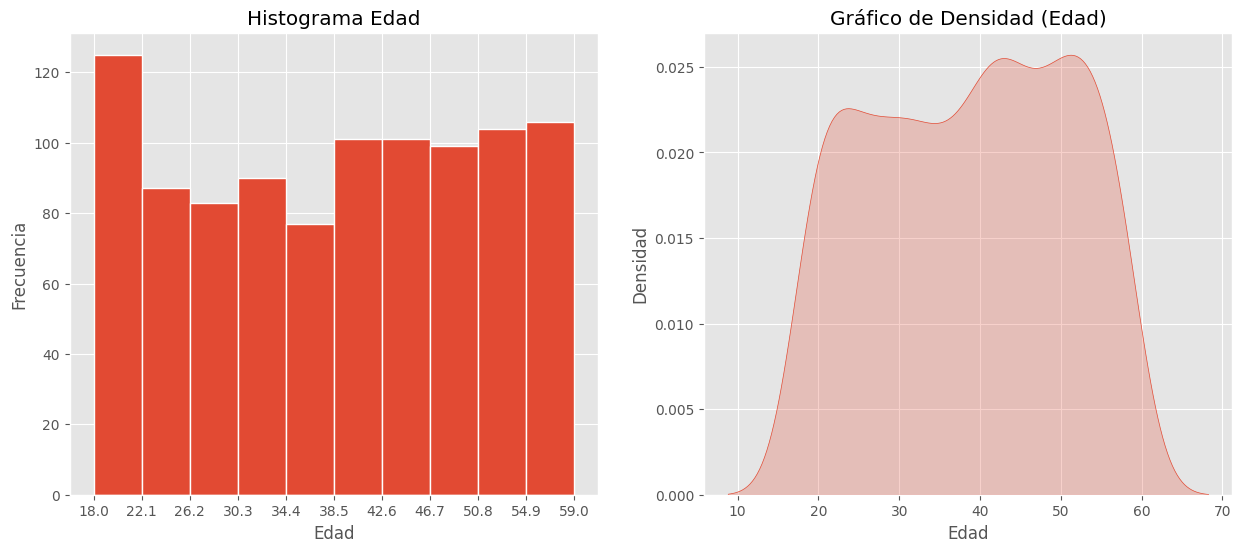

In [7]:
fig, ax = plt.subplots(1,2, figsize=(15, 6))

# Datos de 'Age' del dataframe
age = df['Age']

# Crear los rangos de forma 'proporcional' para el histograma
min_valor = df['Age'].min()
max_valor = df['Age'].max()
num_bins = 10
bins = np.linspace(min_valor, max_valor, num_bins + 1)

# Histograma para los datos 'Age'
ax[0].hist(age, bins=bins, linewidth=1, edgecolor="white")
ax[0].set_xticks(bins)

# Titulo de grafico y ejes
ax[0].set_title("Histograma Edad")
ax[0].set_xlabel("Edad")
ax[0].set_ylabel("Frecuencia")

# Grafico de densidad para la variable 'Age'
sns.kdeplot(df['Age'], fill=True)

# Titulo de grafico y ejes
ax[1].set_title("Gráfico de Densidad (Edad)")
ax[1].set_xlabel("Edad")
ax[1].set_ylabel("Densidad")

Text(0.5, 0, 'Edad')

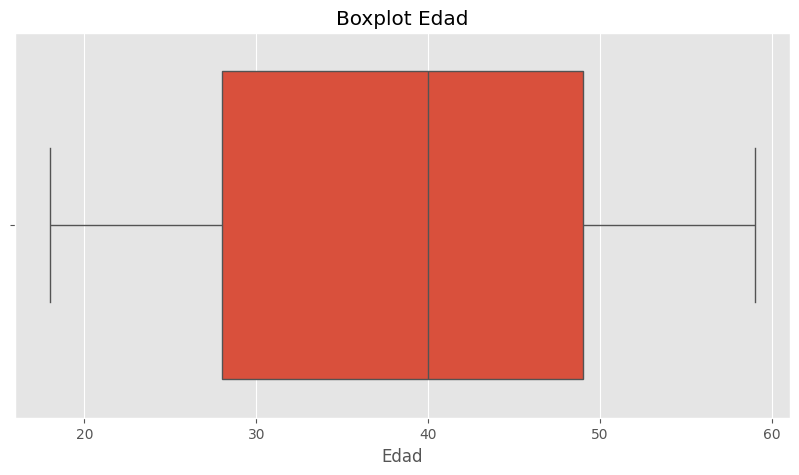

In [8]:
fig = plt.subplots(figsize=(10, 5))

# Grafico 'Boxplot' para la variable 'Age'
sns.boxplot(df['Age'],orient='h', saturation=0.9)
plt.title('Boxplot Edad')
plt.xlabel('Edad')

* Análisis para la variable - 'Weight (kg)'

In [9]:
# Medidad de tendencia del dato 'Weight(Kg)'
df['Weight (kg)'].describe()

,Weight (kg)
count,973.000000
mean,73.854676
std,21.207500
min,40.000000
25%,58.100000
50%,70.000000
75%,86.000000
max,129.900000


Text(0, 0.5, 'Densidad')

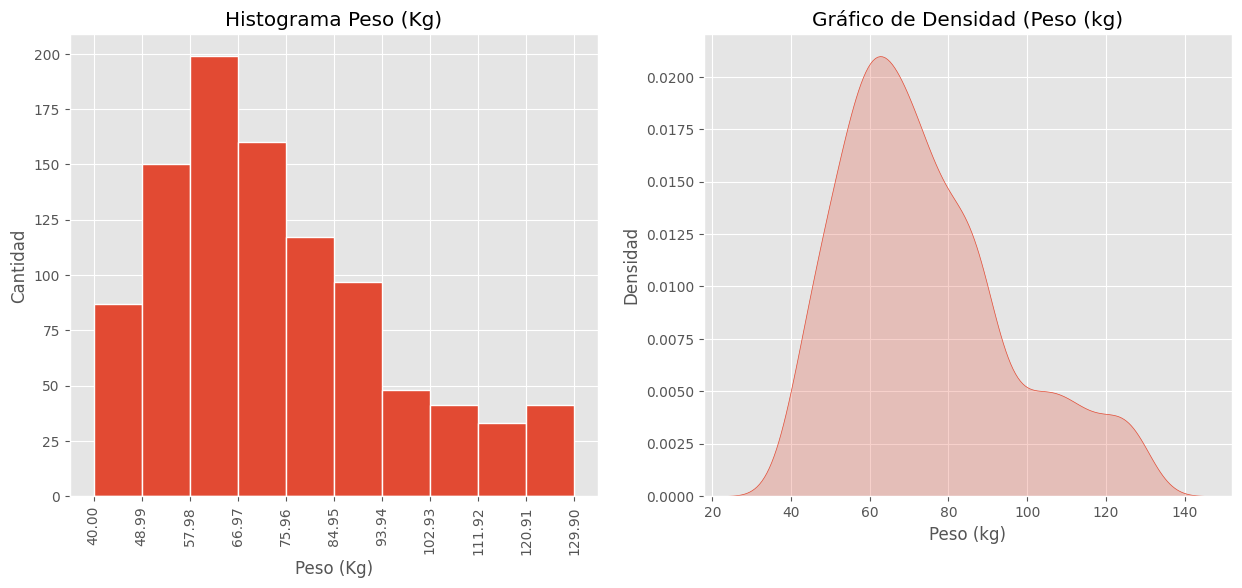

In [10]:
fig, ax = plt.subplots(1,2, figsize=(15, 6))

# Variable 'Weight' del dataframe
weight = df['Weight (kg)']

# Crear los rangos de forma 'proporcional' para el histograma
min_valor = df['Weight (kg)'].min()
max_valor = df['Weight (kg)'].max()
num_bins = 10
bins = np.linspace(min_valor, max_valor, num_bins + 1)

# Histograma para los datos 'Weight'
ax[0].hist(weight, bins=bins, linewidth=1, edgecolor="white")
ax[0].set_xticks(bins)
ax[0].set_xticklabels([f'{x:.2f}' for x in bins], rotation=90)

# Titulo de grafico y ejes
ax[0].set_title("Histograma Peso (Kg)")
ax[0].set_xlabel("Peso (Kg)")
ax[0].set_ylabel("Cantidad")

# Grafico de densidad
sns.kdeplot(df['Weight (kg)'], fill=True)

# Titulo de grafico y ejes
ax[1].set_title("Gráfico de Densidad (Peso (kg)")
ax[1].set_xlabel("Peso (kg)")
ax[1].set_ylabel("Densidad")

Text(0.5, 0, 'Peso')

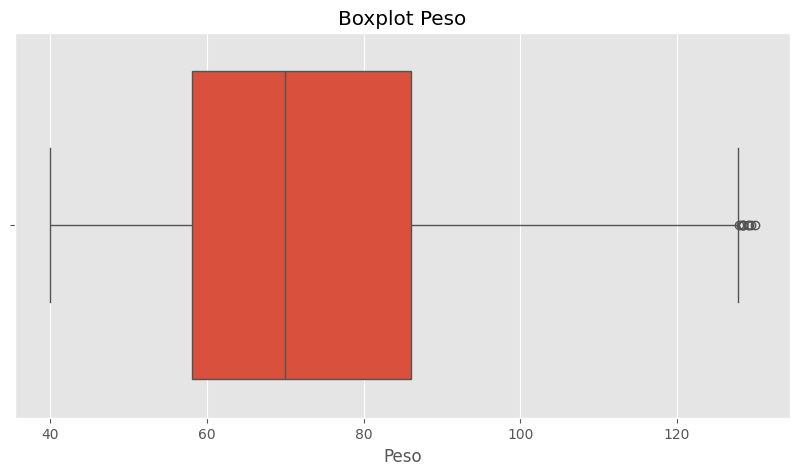

In [11]:
fig = plt.subplots(figsize=(10, 5))

# Grafico 'Boxplot' para la variable 'Weight'
sns.boxplot(df['Weight (kg)'],orient='h', saturation=0.9)
plt.title('Boxplot Peso')
plt.xlabel('Peso')

* Análisis para la variable - 'Height (m)'

In [12]:
df['Height (m)'].describe()

,Height (m)
count,973.00000
mean,1.72258
std,0.12772
min,1.50000
25%,1.62000
50%,1.71000
75%,1.80000
max,2.00000


Text(0, 0.5, 'Densidad')

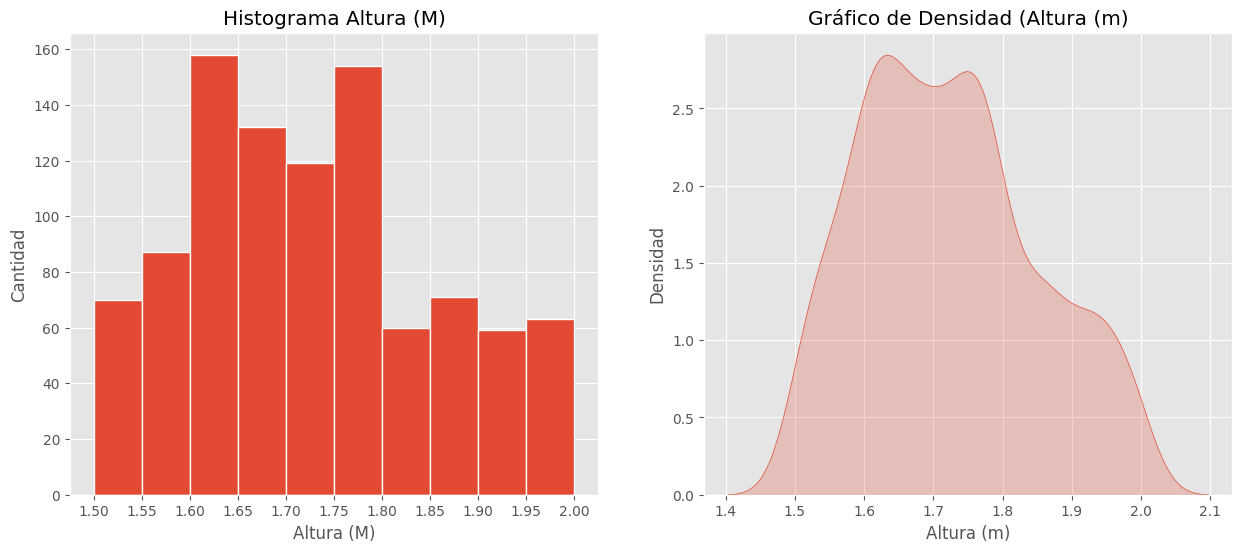

In [13]:
fig, ax = plt.subplots(1,2, figsize=(15, 6))

# Variable 'Height' del dataframe
height = df['Height (m)']

# Crear los rangos de forma 'proporcional' para el histograma
min_valor = df['Height (m)'].min()
max_valor = df['Height (m)'].max()
num_bins = 10
bins = np.linspace(min_valor, max_valor, num_bins + 1)

# Histograma para los datos 'Height'
ax[0].hist(height, bins=bins, linewidth=1, edgecolor="white")
ax[0].set_xticks(bins);

# Titulo de grafico y ejes
ax[0].set_title("Histograma Altura (M)")
ax[0].set_xlabel("Altura (M)")
ax[0].set_ylabel("Cantidad")

# Grafico de densidad de los datos 'Height'
sns.kdeplot(df['Height (m)'], fill=True)
ax[1].set_title("Gráfico de Densidad (Altura (m)")
ax[1].set_xlabel("Altura (m)")
ax[1].set_ylabel("Densidad")

Text(0.5, 0, 'Altura')

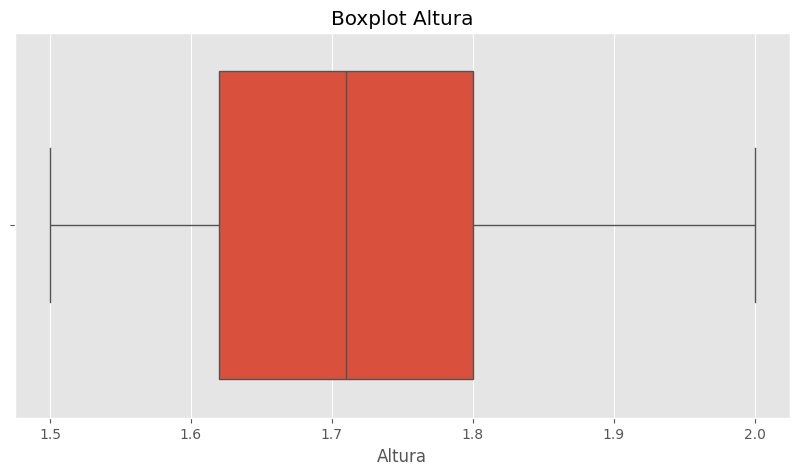

In [14]:
fig = plt.subplots(figsize=(10, 5))

# Grafico 'Boxplot' de los datos 'Height'
sns.boxplot(df['Height (m)'],orient='h', saturation=0.9)
plt.title('Boxplot Altura')
plt.xlabel('Altura')

* Análisis para la variable - 'Gender'

In [15]:
df['Gender'].describe()

,Gender
count,973
unique,2
top,Male
freq,511


(0.0, 30.92001174168297)

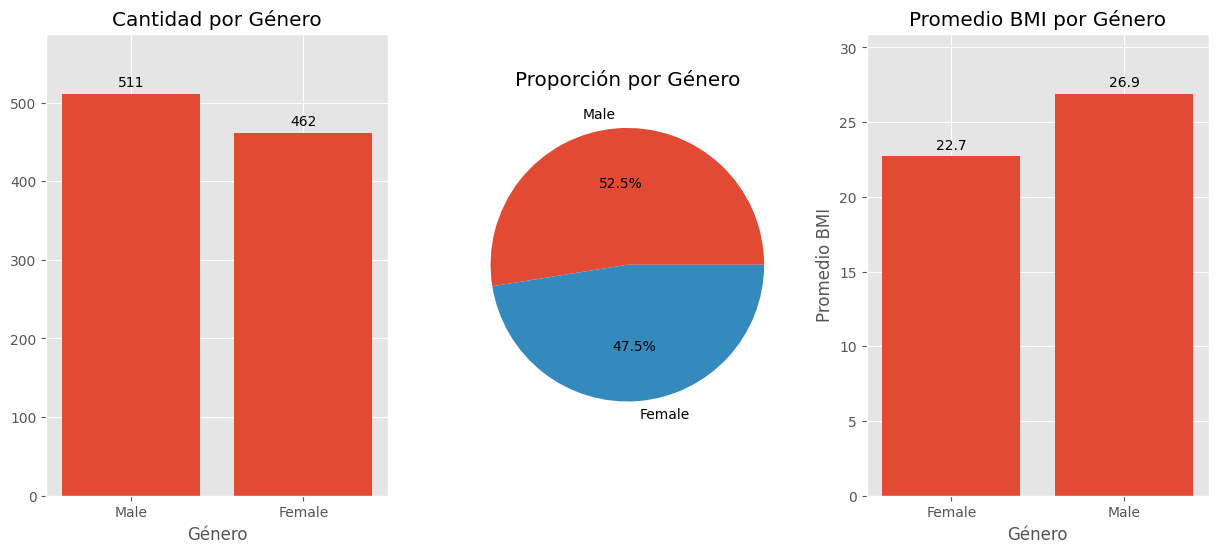

In [48]:
fig, axs = plt.subplots(1,3, figsize=(15, 6))

# Datos de 'Gender' del dataframe
gender = df['Gender']
counts = gender.value_counts()
bmi_by_gender = df.groupby('Gender')['BMI'].mean()

# Grafico de barras para la variable 'Gender'
bars = axs[0].bar(counts.index, counts.values)
axs[0].set_title("Cantidad por Género")
axs[0].set_xlabel("Género")

# Agrega etiquetas
axs[0].bar_label(bars, labels=[str(v) for v in counts.values], padding=3)

# Asegurar espacio superior para que no se corten las etiquetas
axs[0].set_ylim(0, counts.values.max() * 1.15)

# Grafico de pastel para la variable 'Gender'
axs[1].pie(counts, labels=counts.index, autopct='%1.1f%%')
axs[1].set_title("Proporción por Género")

# Grafico de barras BMI
bars = axs[2].bar(bmi_by_gender.index, bmi_by_gender.values)

# Titulo de grafico y ejes
axs[2].set_title("Promedio BMI por Género")
axs[2].set_xlabel("Género")
axs[2].set_ylabel("Promedio BMI")

# Etiqueta de datos
axs[2].bar_label(bars, fmt='%1.1f', padding=3)
axs[2].set_ylim(0, bmi_by_gender.max() * 1.15)

### Análisis Bivariado y Multivariado

El análisis se enfoca en explorar la relación entre variables. Su objetivo es identificar asociaciones, correlaciones o patrones que existan entre ellas.

Text(0, 0.5, 'Frecuencia de Entrenamiento (Días Semana)')

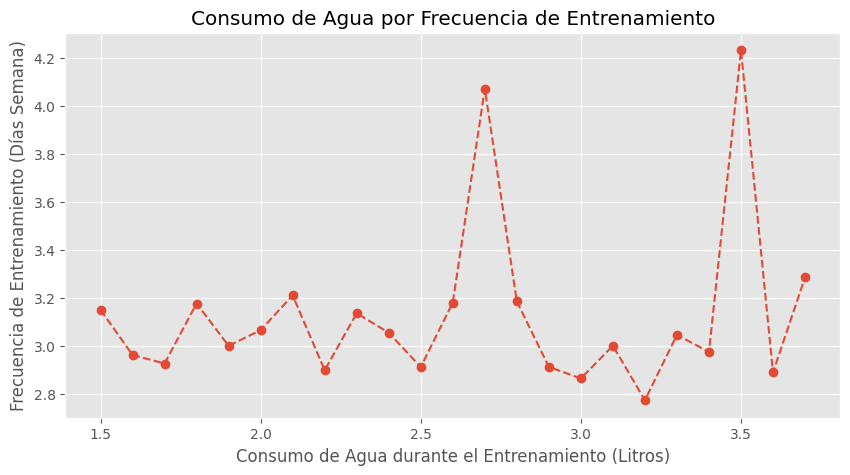

In [88]:
fig, ax = plt.subplots(figsize=(10, 5))

fat_water = df.groupby('Water_Intake (liters)')['Workout_Frequency (days/week)'].mean()
x = fat_water.index
y = fat_water.values

ax.plot(x, y, marker='o', linestyle='dashed')

ax.set_title('Consumo de Agua por Frecuencia de Entrenamiento')
ax.set_xlabel('Consumo de Agua durante el Entrenamiento (Litros)')
ax.set_ylabel('Frecuencia de Entrenamiento (Días Semana)')

In [70]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


(0.0, 1469.2039215686273)

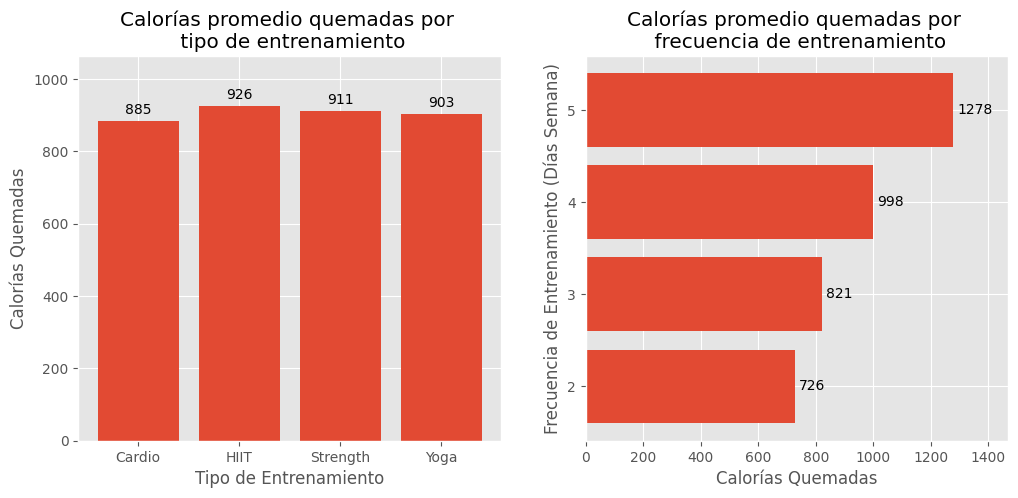

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Datos originales
calories = df['Calories_Burned']
workout = df['Workout_Type']
frequency = df['Workout_Frequency (days/week)']

# Agrupar por tipo de entrenamiento
cal_by_workout = df.groupby('Workout_Type')['Calories_Burned'].mean()
bars1 = axs[0].bar(cal_by_workout.index, cal_by_workout.values)

# Titulo de grafico y ejes
axs[0].set_title("Calorías promedio quemadas por \n tipo de entrenamiento")
axs[0].set_ylabel("Calorías Quemadas")
axs[0].set_xlabel("Tipo de Entrenamiento")

# Etiquetas de valores
axs[0].bar_label(bars1, fmt='%.0f', padding=3)
axs[0].set_ylim(0, cal_by_workout.max() * 1.15)

# Agrupar por frecuencia de entrenamiento (ordenar por frecuencia)
cal_by_freq = df.groupby('Workout_Frequency (days/week)')['Calories_Burned'].mean()
bars2 = axs[1].barh(cal_by_freq.index.astype(str), cal_by_freq.values)

# Titulo de grafico y ejes
axs[1].set_title("Calorías promedio quemadas por \n frecuencia de entrenamiento")
axs[1].set_ylabel("Frecuencia de Entrenamiento (Días Semana)")
axs[1].set_xlabel("Calorías Quemadas")

# Etiquetas de valores
axs[1].bar_label(bars2, fmt='%.0f', padding=3)
axs[1].set_xlim(0, cal_by_freq.max() * 1.15)

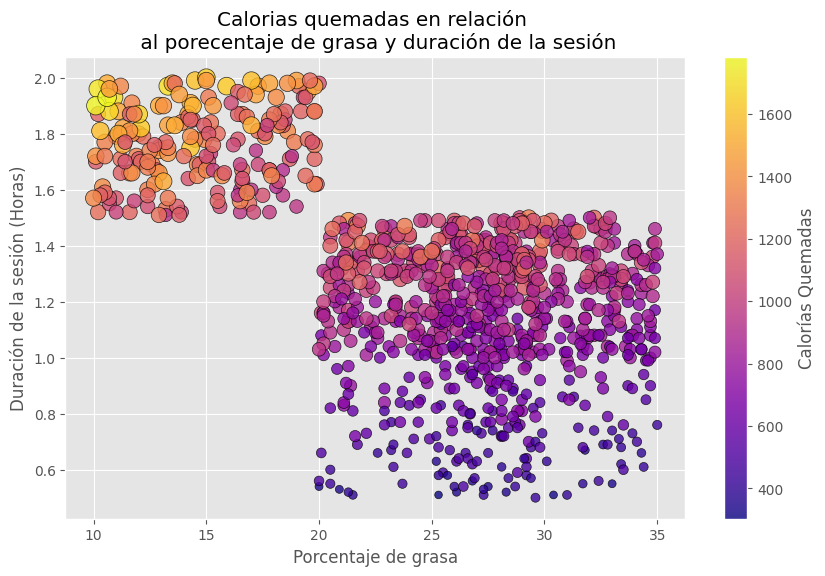

In [19]:
fig, ax = plt.subplots()

# Datos originales del Dataset
calories = df['Calories_Burned']
session = df['Session_Duration (hours)']
fat_perc = df['Fat_Percentage']

# Grafico de Dispersión
scatter = ax.scatter(fat_perc, session, s=calories*0.1, c=calories, cmap='plasma', alpha=0.8, edgecolors='black')

# Titulo grafico y ejes
ax.set_title('Calorias quemadas en relación \n al porecentaje de grasa y duración de la sesión')
ax.set_xlabel('Porcentaje de grasa')
ax.set_ylabel('Duración de la sesión (Horas)')

cbar = fig.colorbar(scatter, ax=ax, orientation='vertical')
cbar.set_label('Calorías Quemadas')